In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

from sklearn.model_selection import train_test_split

import tensorflow
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img, img_to_array, array_to_img
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers, models
from keras.layers import Flatten, Dense, Dropout, Conv2D, MaxPooling2D, GlobalAveragePooling2D,\
InputLayer,BatchNormalization,Activation
from tensorflow.keras.applications import mobilenet_v2,EfficientNetB0

import cv2
import re

Image Dimensions : (64, 64, 3)


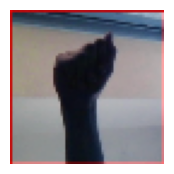

In [12]:
img_width, img_height = 64, 64
plt.figure(figsize=(2,2))
img = cv2.imread('./asl-alphabet/asl_alphabet_train/asl_alphabet_train/A/A1.jpg')
plt.imshow(cv2.resize(img, (img_width, img_height)))
plt.axis('off')
print('Image Dimensions :', cv2.resize(img, (img_width, img_height)).shape)

In [13]:
train_folder = './asl-alphabet/asl_alphabet_train/asl_alphabet_train'
images = []
labels = []
index = 0
for folder in sorted(os.listdir(train_folder)):
    if folder != '.DS_Store':
        for image in os.listdir(train_folder + '/' + folder):
            img = cv2.imread(train_folder + '/' + folder + '/' + image)
            images.append(img_to_array(cv2.resize(img, (img_width, img_height))))
            labels.append(index)
        index += 1

In [14]:
images = np.array(images)
labels = to_categorical(labels)
x_train, x_val, y_train, y_val = train_test_split(images, labels, random_state = 42, test_size=0.1)

In [15]:
train_datagen = ImageDataGenerator(rescale = 1./255.0)
train_generator = train_datagen.flow(x_train, y_train, batch_size=128)

validation_datagen = ImageDataGenerator(rescale = 1./255.0)
validation_generator = validation_datagen.flow(x_val,y_val, batch_size=128)

In [16]:
def transfermodeling(modelnm,img_width,img_height):
  base_model = modelnm(weights='imagenet', include_top=False, input_shape=(img_width, img_height,3))
  for layer in base_model.layers:
      layer.trainable = False

  model = models.Sequential([
        base_model,  
        Flatten(),
        Dense(512, activation='relu'),
        Dense(29, activation='softmax')
  ])

  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [22]:
model = transfermodeling(mobilenet_v2.MobileNetV2,img_width, img_height)
transhist = model.fit(x_train, y_train, epochs=10, verbose=1, validation_data=(x_val, y_val), shuffle = True)

Epoch 1/10
2447/2447 [==============================] - 117s 47ms/step - loss: 1.8683 - accuracy: 0.4471 - val_loss: 1.1211 - val_accuracy: 0.6341
Epoch 2/10
2447/2447 [==============================] - 115s 47ms/step - loss: 0.9455 - accuracy: 0.6866 - val_loss: 0.8917 - val_accuracy: 0.6997
Epoch 3/10
2447/2447 [==============================] - 115s 47ms/step - loss: 0.7849 - accuracy: 0.7377 - val_loss: 0.8428 - val_accuracy: 0.7220
Epoch 4/10
2447/2447 [==============================] - 115s 47ms/step - loss: 0.6901 - accuracy: 0.7677 - val_loss: 0.8356 - val_accuracy: 0.7274
Epoch 5/10
2447/2447 [==============================] - 114s 47ms/step - loss: 0.6244 - accuracy: 0.7863 - val_loss: 0.7724 - val_accuracy: 0.7484
Epoch 6/10
2447/2447 [==============================] - 114s 47ms/step - loss: 0.5839 - accuracy: 0.8016 - val_loss: 0.7304 - val_accuracy: 0.7601
Epoch 7/10
2447/2447 [==============================] - 115s 47ms/step - loss: 0.5407 - accuracy: 0.8160 - val_loss: 0

In [17]:
model = transfermodeling(EfficientNetB0,img_width, img_height)
transhist = model.fit(x_train, y_train, epochs=10, verbose=1, validation_data=(x_val, y_val), shuffle = True)

2022-10-04 21:00:38.434668: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-10-04 21:00:38.437231: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-04 21:00:40.489096: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)


Epoch 1/10
2447/2447 [==============================] - 359s 145ms/step - loss: 0.5354 - accuracy: 0.8411 - val_loss: 0.0681 - val_accuracy: 0.9772
Epoch 2/10
2447/2447 [==============================] - 367s 150ms/step - loss: 0.1157 - accuracy: 0.9624 - val_loss: 0.0472 - val_accuracy: 0.9839
Epoch 3/10
2447/2447 [==============================] - 292s 119ms/step - loss: 0.0845 - accuracy: 0.9733 - val_loss: 0.0431 - val_accuracy: 0.9864
Epoch 4/10
2447/2447 [==============================] - 178s 73ms/step - loss: 0.0774 - accuracy: 0.9751 - val_loss: 0.0428 - val_accuracy: 0.9847
Epoch 5/10
2447/2447 [==============================] - 175s 72ms/step - loss: 0.0678 - accuracy: 0.9791 - val_loss: 0.0476 - val_accuracy: 0.9844
Epoch 6/10
2447/2447 [==============================] - 175s 72ms/step - loss: 0.0581 - accuracy: 0.9828 - val_loss: 0.0151 - val_accuracy: 0.9956
Epoch 7/10
2447/2447 [==============================] - 174s 71ms/step - loss: 0.0605 - accuracy: 0.9827 - val_loss

In [18]:
import re
ASL_dict = {0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'J', 
            10: 'K', 11: 'L', 12: 'M', 13: 'N', 14: 'O', 15: 'P', 16: 'Q', 17: 'R', 18: 'S', 
            19: 'T', 20: 'U', 21: 'V', 22: 'W', 23: 'X', 24: 'Y', 25: 'Z', 26: 'del', 27: 'nothing', 28: 'space'}
def testdata_val(test_folder,splitname,model):
    images_te = []
    index = 0
    for img in sorted(os.listdir(test_folder)):
        images_te = []
        img2 = cv2.imread(test_folder + '/' + img)
#         img2 = cv2.addWeighted(img2,1.3,np.zeros(img2.shape, img2.dtype),0,0)
        images_te.append(img_to_array(cv2.resize(img2, (img_width, img_height))))
        images_te = np.array(images_te)

        test_datagen = ImageDataGenerator(rescale = 1/255.0)
        test_generator = test_datagen.flow(images_te, None, batch_size=128)

        pred = np.argmax(model.predict(images_te, verbose = 1),axis = 1)

        plt.figure(figsize=(2,2))    
        imgtitle = 'Sign: '+ re.split(splitname, img)[0] + '.\nPrediction: ' + ASL_dict[pred[0]]
        plt.title(imgtitle)
        plt.imshow(cv2.imread(test_folder + '/' + img))
        plt.axis('off')

1/1 [==============================] - 0s 15ms/step


/var/folders/jm/nrwptkws5fsbvfzyx3trfbcw0000gn/T/ipykernel_6185/4231299921.py:20: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(2,2))


1/1 [==============================] - 0s 15ms/step


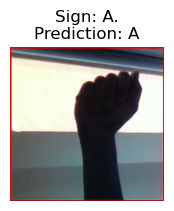

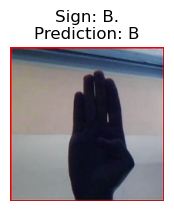

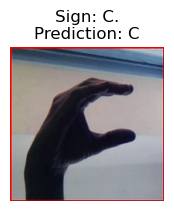

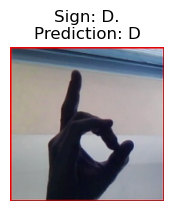

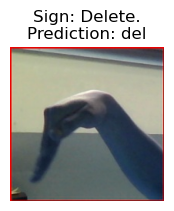

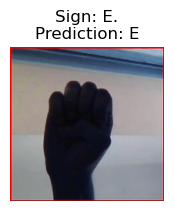

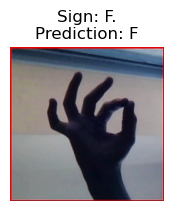

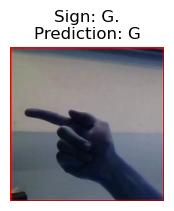

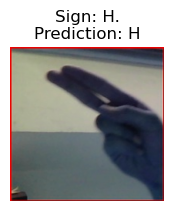

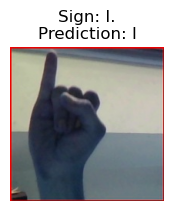

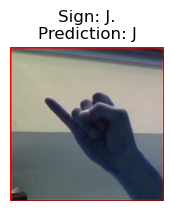

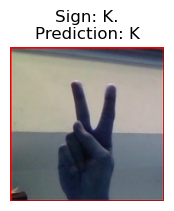

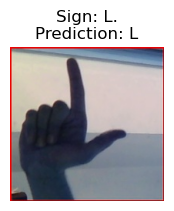

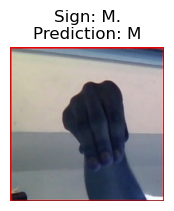

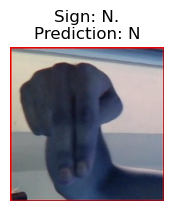

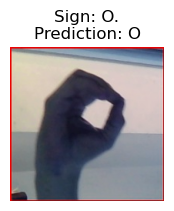

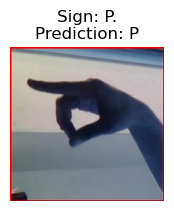

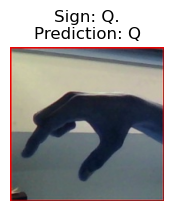

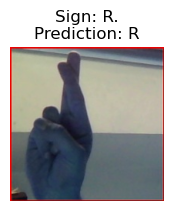

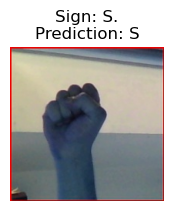

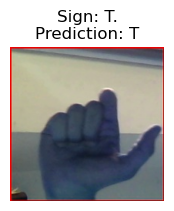

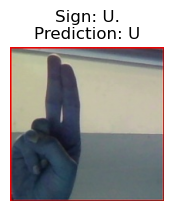

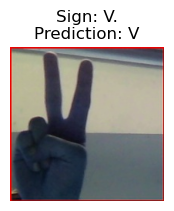

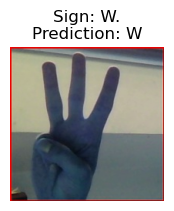

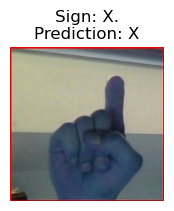

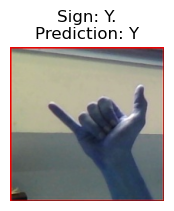

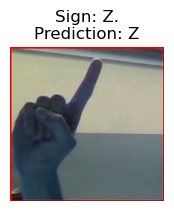

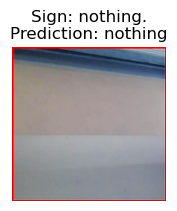

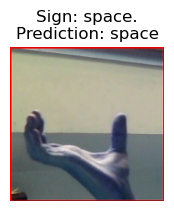

In [19]:
testdata_val('./asl-alphabet/asl_alphabet_test/asl_alphabet_test',"_test",model)

1/1 [==============================] - 0s 17ms/step


/var/folders/jm/nrwptkws5fsbvfzyx3trfbcw0000gn/T/ipykernel_1985/1538425681.py:20: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(2,2))


1/1 [==============================] - 0s 17ms/step


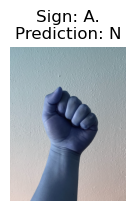

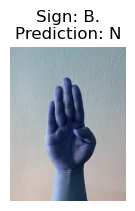

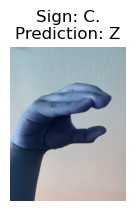

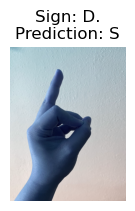

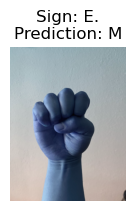

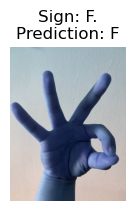

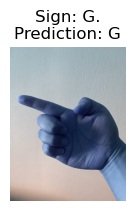

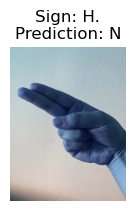

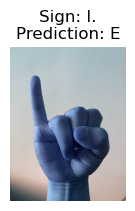

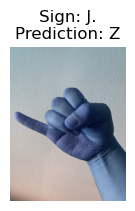

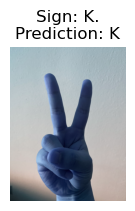

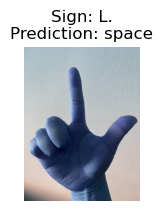

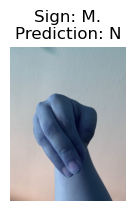

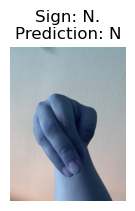

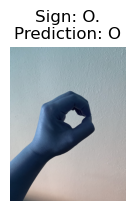

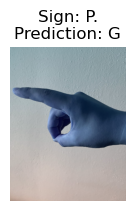

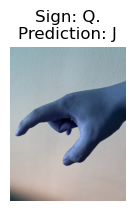

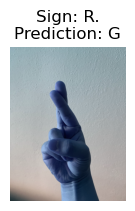

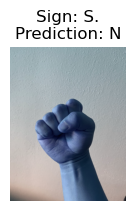

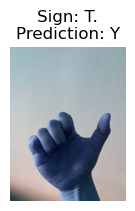

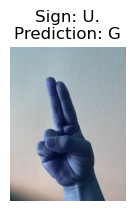

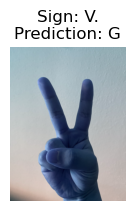

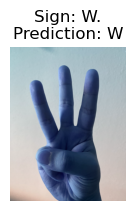

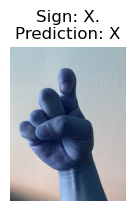

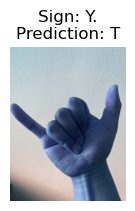

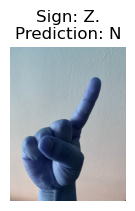

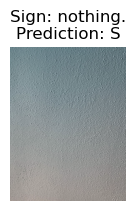

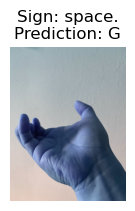

In [51]:
testdata_val('./asl-alphabet/myhand2',"_mh2",model)

In [7]:
def figdisplay(test_folder,splitname):
    images_te = []
    index = 0
    for img in sorted(os.listdir(test_folder)):
        plt.figure(figsize=(2,2))    
        imgtitle = 'Sign: '+ re.split(splitname, img)[0]
        plt.title(imgtitle)
        plt.imshow(cv2.imread(test_folder + '/' + img))
        plt.axis('off')

/var/folders/jm/nrwptkws5fsbvfzyx3trfbcw0000gn/T/ipykernel_6185/944157917.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(2,2))


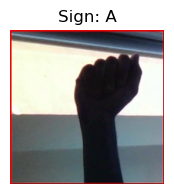

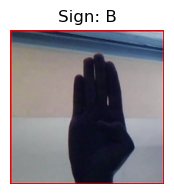

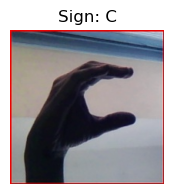

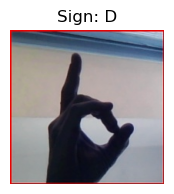

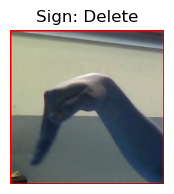

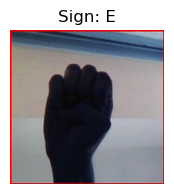

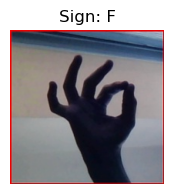

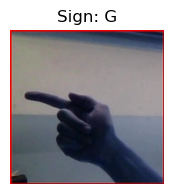

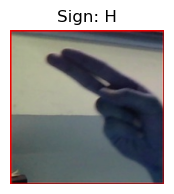

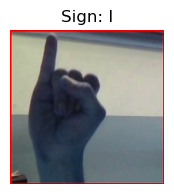

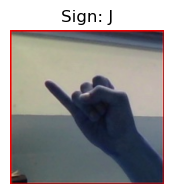

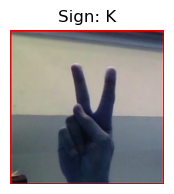

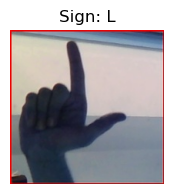

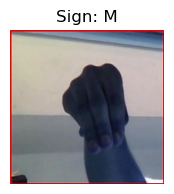

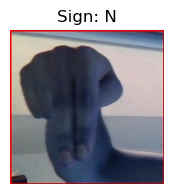

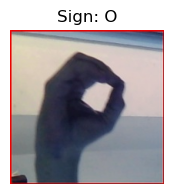

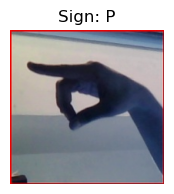

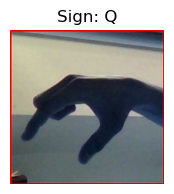

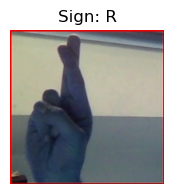

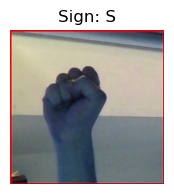

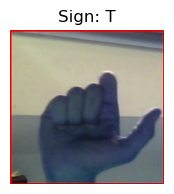

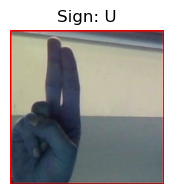

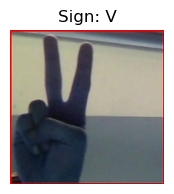

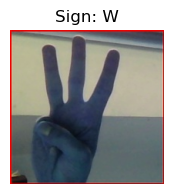

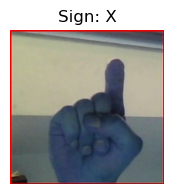

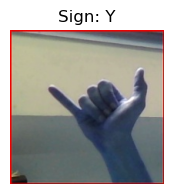

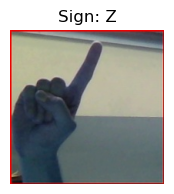

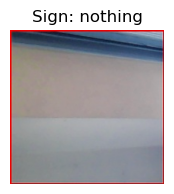

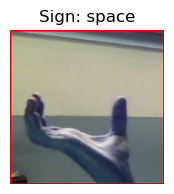

In [10]:
figdisplay('./asl-alphabet/asl_alphabet_test/asl_alphabet_test',"_test")